# Cliff Walking (Q Learning)

In this section, we aim to devise a solution for the Cliff Walking problem utilizing the Q-Learning technique.

In [2]:
import gym
import numpy as np
import random
import imageio 
from matplotlib import pyplot as plt

## Context

In [3]:
env = gym.make("CliffWalking-v0", render_mode ="rgb_array")


In the Cliff Walking problem, the state of the game is encoded as an 'int' between 0 and 36. Despite being displayed as a grid with some locations and passengers, all the combinations are represented as 'int'.

Because the board is 4x12 matrix, with 1x10 row of cliff, minus 1 with the beginning => (4*12) - (1*10) -1 = 37 possible states.
The encoding is possible because the game doesn't offer a lot of possibilities, and having only 37 different states can easily be handled.

In [5]:
state, info = env.reset()
state

36

In addition, we have 4 possible actions encoded as 'int' between 0 and 3 : move up, move right, move down and move left.

In [6]:
env.action_space.n

4

Now before applying the learning algorithm. Why QLearning ?
Because there are a limited number of states (only 37), and not a huge number of possible actions (onyl 4), using a Q-Table seems to be pretty designed for this task, this low dimension allow us to apply QLearning.

As a result our QTable, will be a table with a dimenson of 37x4, we want to have a table of all the states for each action, so that we know for a specific state what is the right action to take.

In [7]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

## QLearning Algorithm

We now want to make the computer learn the situation by using the algorithm of qlearning.


For a given number of episodes, we want the computer to be able to go to the final postion, if the computer manage then it gets rewarded.
To penalize its slowness or mistake, the algorithm reward -1 for each step taken, and -100 if the character fall into the cliff.

For a given number of maximum steps (max number of action to take in order to complete the task). Either we explore or the take the best action given by the Qtable, take the action given and update the Qtable with the action and the new state.

In [6]:
achieve_steps = []
def QLearning(env, learning, discount, epsilon, max_steps, episodes):
    

    for i in range(episodes):
        print("Episodes n°:", i)
        state, info = env.reset()
        done = False
        decay_rate= 0.005


        for j in range(max_steps):
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(qtable[state, :])

            new_state, reward, done, truncated, info = env.step(action)

            qtable[state, action] = qtable[state, action] + learning * (reward + discount * np.max(qtable[new_state, :])-qtable[state, action])

            state = new_state

            if done == True:
                break
        achieve_steps.append(j)
        epsilon = np.exp(-decay_rate*i)


## Let's learn!

In [7]:
QLearning(env, 0.9, 0.8, 1.0, 99, 1000)

Episodes n°: 0
Episodes n°: 1
Episodes n°: 2
Episodes n°: 3
Episodes n°: 4
Episodes n°: 5
Episodes n°: 6
Episodes n°: 7
Episodes n°: 8
Episodes n°: 9
Episodes n°: 10
Episodes n°: 11
Episodes n°: 12
Episodes n°: 13
Episodes n°: 14
Episodes n°: 15
Episodes n°: 16
Episodes n°: 17
Episodes n°: 18
Episodes n°: 19
Episodes n°: 20
Episodes n°: 21
Episodes n°: 22
Episodes n°: 23
Episodes n°: 24
Episodes n°: 25
Episodes n°: 26
Episodes n°: 27
Episodes n°: 28
Episodes n°: 29
Episodes n°: 30
Episodes n°: 31
Episodes n°: 32
Episodes n°: 33
Episodes n°: 34
Episodes n°: 35
Episodes n°: 36
Episodes n°: 37
Episodes n°: 38
Episodes n°: 39
Episodes n°: 40
Episodes n°: 41
Episodes n°: 42
Episodes n°: 43
Episodes n°: 44
Episodes n°: 45
Episodes n°: 46
Episodes n°: 47
Episodes n°: 48
Episodes n°: 49
Episodes n°: 50
Episodes n°: 51
Episodes n°: 52
Episodes n°: 53
Episodes n°: 54
Episodes n°: 55
Episodes n°: 56
Episodes n°: 57
Episodes n°: 58
Episodes n°: 59
Episodes n°: 60
Episodes n°: 61
Episodes n°: 62
Ep

c:\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episodes n°: 64
Episodes n°: 65
Episodes n°: 66
Episodes n°: 67
Episodes n°: 68
Episodes n°: 69
Episodes n°: 70
Episodes n°: 71
Episodes n°: 72
Episodes n°: 73
Episodes n°: 74
Episodes n°: 75
Episodes n°: 76
Episodes n°: 77
Episodes n°: 78
Episodes n°: 79
Episodes n°: 80
Episodes n°: 81
Episodes n°: 82
Episodes n°: 83
Episodes n°: 84
Episodes n°: 85
Episodes n°: 86
Episodes n°: 87
Episodes n°: 88
Episodes n°: 89
Episodes n°: 90
Episodes n°: 91
Episodes n°: 92
Episodes n°: 93
Episodes n°: 94
Episodes n°: 95
Episodes n°: 96
Episodes n°: 97
Episodes n°: 98
Episodes n°: 99
Episodes n°: 100
Episodes n°: 101
Episodes n°: 102
Episodes n°: 103
Episodes n°: 104
Episodes n°: 105
Episodes n°: 106
Episodes n°: 107
Episodes n°: 108
Episodes n°: 109
Episodes n°: 110
Episodes n°: 111
Episodes n°: 112
Episodes n°: 113
Episodes n°: 114
Episodes n°: 115
Episodes n°: 116
Episodes n°: 117
Episodes n°: 118
Episodes n°: 119
Episodes n°: 120
Episodes n°: 121
Episodes n°: 122
Episodes n°: 123
Episodes n°: 124

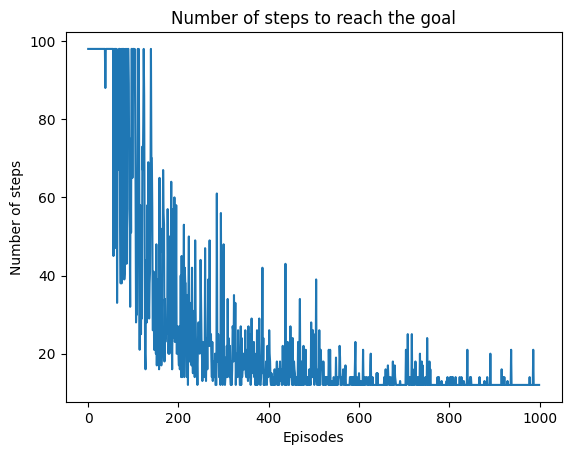

In [8]:
plt.plot(achieve_steps)
plt.title('Number of steps to reach the goal')
plt.xlabel('Episodes')
plt.ylabel('Number of steps')
plt.show()

Despite being quite noisy, the graph demonstrates a clear convergence over time. This indicates that the Q-Learning method is a good solution to solve this taks.
However, it shows that with current parameters, it requires at least 600 epochs to solve the task in an moderate number of steps.

## Create the GIF

In [10]:
env.close()
env = gym.make("CliffWalking-v0", render_mode ="rgb_array")

state,info = env.reset()

images = []


while 1>0:

    action = np.argmax(qtable[state,:])
    new_state, reward, done, trunc, info = env.step(action)
    frame = env.render()
    images.append(frame)
    state= new_state

    if done == True:
        break

env.close()
imageio.mimsave('img/CliffWalking.gif', images, fps=59)